# Basic Stock Price Analysis with Python
In this notebook, I will try to make a stock analysis of 4 largest private bank in Tukey, which have stocks traded in Borsa Istanbul:
 - Turkiye Is Bankasi A.S. (ISB)
 - Turkiye Garanti Bankasi A.S. (GRN)
 - Yapi ve Kredi Bankasi A.S. (YKB)
 - Akbank T.A.S. (AKB)

In [1]:
## If yfinance is not already installed in your computer, run "pip install yfinance" at the beginning of the notebook
# pip install yfinance

In [2]:
## Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


from datetime import datetime, timedelta

n=3

todays_date  = str(datetime.today().strftime('%Y-%m-%d'))
n_years_ago  = str((datetime.today() - timedelta(365*n)).strftime('%Y-%m-%d'))


print("-"*25)
print(f'This analysis covers the dates between {n_years_ago} and {todays_date} ')
print("-"*25)
print ("Initiation is DONE !!")
print("-"*25)

-------------------------
This analysis covers the dates between 2017-11-02 and 2020-11-01 
-------------------------
Initiation is DONE !!
-------------------------


## 1. LOADING HISTORICAL PRICE DATA OF THE STOCKS

In [3]:
isb = yf.Ticker('ISCTR.IS')

df0 = isb.history(period='max', prepost=True)
df0.columns = [ 'ISB_' + col for col in df0.columns]

print(df0.shape)
print("-"*25)
df0.tail()

(3090, 7)
-------------------------


,ISB_Open,ISB_High,ISB_Low,ISB_Close,ISB_Volume,ISB_Dividends,ISB_Stock Splits
Date,,,,,,,
2020-10-23,5.48,5.54,5.37,5.40,32094582,0.0,0.0
2020-10-26,5.30,5.31,5.11,5.12,57221544,0.0,0.0
2020-10-27,5.08,5.26,5.07,5.26,47518970,0.0,0.0
2020-10-28,5.23,5.29,5.18,5.21,17819940,0.0,0.0
2020-10-30,5.10,5.19,5.08,5.11,47113132,0.0,0.0


In [4]:
grn = yf.Ticker('GARAN.IS')

df1 = grn.history(period='max', prepost=True)
df1.columns = [ 'GRN_' + col for col in df1.columns]

print(df1.shape)
print("-"*25)
df1.tail()

(5162, 7)
-------------------------


,GRN_Open,GRN_High,GRN_Low,GRN_Close,GRN_Volume,GRN_Dividends,GRN_Stock Splits
Date,,,,,,,
2020-10-23,7.09,7.12,6.98,7.06,159953885,0.0,0.0
2020-10-26,6.97,6.98,6.78,6.79,164744477,0.0,0.0
2020-10-27,6.77,6.93,6.74,6.89,168600614,0.0,0.0
2020-10-28,6.88,6.93,6.77,6.78,78185403,0.0,0.0
2020-10-30,6.68,6.73,6.59,6.61,165510881,0.0,0.0


In [5]:
ykb = yf.Ticker('YKBNK.IS')

df2 = ykb.history(period='max', prepost=True)
df2.columns = [ 'YKB_' + col for col in df2.columns]

print(df2.shape)
print("-"*25)
df2.tail()

(5230, 7)
-------------------------


,YKB_Open,YKB_High,YKB_Low,YKB_Close,YKB_Volume,YKB_Dividends,YKB_Stock Splits
Date,,,,,,,
2020-10-23,2.25,2.28,2.19,2.22,180577730.0,0.0,0.0
2020-10-26,2.19,2.20,2.09,2.09,205183608.0,0.0,0.0
2020-10-27,2.11,2.18,2.09,2.15,259241323.0,0.0,0.0
2020-10-28,2.15,2.18,2.13,2.14,99282649.0,0.0,0.0
2020-10-30,2.11,2.15,2.10,2.13,167363152.0,0.0,0.0


In [6]:
akb = yf.Ticker('AKBNK.IS')

df3 = akb.history(period='max', prepost=True)
df3.columns = [ 'AKB_' + col for col in df3.columns]

print(df3.shape)
print("-"*25)
df3.tail()

(5294, 7)
-------------------------


,AKB_Open,AKB_High,AKB_Low,AKB_Close,AKB_Volume,AKB_Dividends,AKB_Stock Splits
Date,,,,,,,
2020-10-23,5.13,5.14,5.01,5.07,74796019,0.0,0.0
2020-10-26,5.01,5.01,4.85,4.87,78405136,0.0,0.0
2020-10-27,4.88,4.97,4.84,4.96,77169277,0.0,0.0
2020-10-28,4.94,4.98,4.85,4.89,33004214,0.0,0.0
2020-10-30,4.86,4.86,4.75,4.78,76622682,0.0,0.0


In [7]:
df = df3.merge(df2, how='left', left_index=True, right_index=True)
df = df.merge(df1, how='left', left_index=True, right_index=True)
df = df.merge(df0, how='left', left_index=True, right_index=True)

print(df.shape)
print("-"*25)
df.tail()

(5294, 28)
-------------------------


,AKB_Open,AKB_High,AKB_Low,AKB_Close,AKB_Volume,AKB_Dividends,AKB_Stock Splits,YKB_Open,YKB_High,YKB_Low,YKB_Close,YKB_Volume,YKB_Dividends,YKB_Stock Splits,GRN_Open,GRN_High,GRN_Low,GRN_Close,GRN_Volume,GRN_Dividends,GRN_Stock Splits,ISB_Open,ISB_High,ISB_Low,ISB_Close,ISB_Volume,ISB_Dividends,ISB_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-23,5.13,5.14,5.01,5.07,74796019,0.0,0.0,2.25,2.28,2.19,2.22,180577730.0,0.0,0.0,7.09,7.12,6.98,7.06,159953885.0,0.0,0.0,5.48,5.54,5.37,5.40,32094582.0,0.0,0.0
2020-10-26,5.01,5.01,4.85,4.87,78405136,0.0,0.0,2.19,2.20,2.09,2.09,205183608.0,0.0,0.0,6.97,6.98,6.78,6.79,164744477.0,0.0,0.0,5.30,5.31,5.11,5.12,57221544.0,0.0,0.0
2020-10-27,4.88,4.97,4.84,4.96,77169277,0.0,0.0,2.11,2.18,2.09,2.15,259241323.0,0.0,0.0,6.77,6.93,6.74,6.89,168600614.0,0.0,0.0,5.08,5.26,5.07,5.26,47518970.0,0.0,0.0
2020-10-28,4.94,4.98,4.85,4.89,33004214,0.0,0.0,2.15,2.18,2.13,2.14,99282649.0,0.0,0.0,6.88,6.93,6.77,6.78,78185403.0,0.0,0.0,5.23,5.29,5.18,5.21,17819940.0,0.0,0.0
2020-10-30,4.86,4.86,4.75,4.78,76622682,0.0,0.0,2.11,2.15,2.10,2.13,167363152.0,0.0,0.0,6.68,6.73,6.59,6.61,165510881.0,0.0,0.0,5.10,5.19,5.08,5.11,47113132.0,0.0,0.0


## 2. VISUALISATION OF THE STOCK PRICES

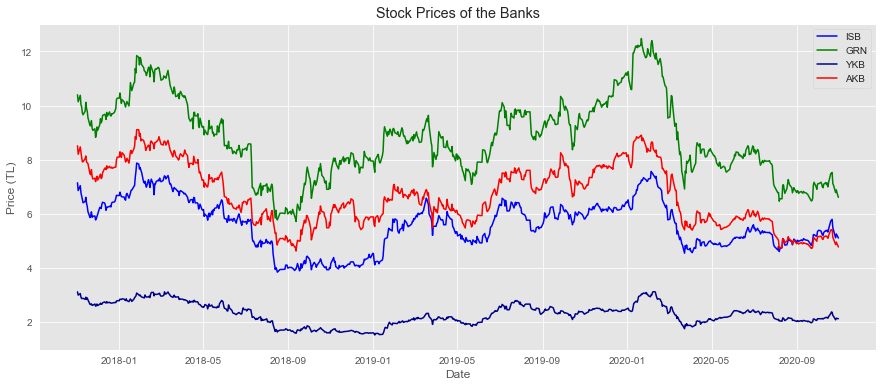

In [8]:
p5 = df.loc[n_years_ago:][['ISB_Close', 'GRN_Close', 'YKB_Close', 'AKB_Close']]

fig, ax = plt.subplots( figsize=(15,6) )

sns.lineplot( data=p5,  x=p5.index,  y='ISB_Close', color='b'  )
sns.lineplot( data=p5,  x=p5.index,  y='GRN_Close', color='g'  )
sns.lineplot( data=p5,  x=p5.index,  y='YKB_Close', color='darkblue'  )
sns.lineplot( data=p5,  x=p5.index,  y='AKB_Close', color='r'  )

plt.title('Stock Prices of the Banks')
plt.ylabel('Price (TL)')
plt.legend(['ISB','GRN', 'YKB', 'AKB'])

plt.show()

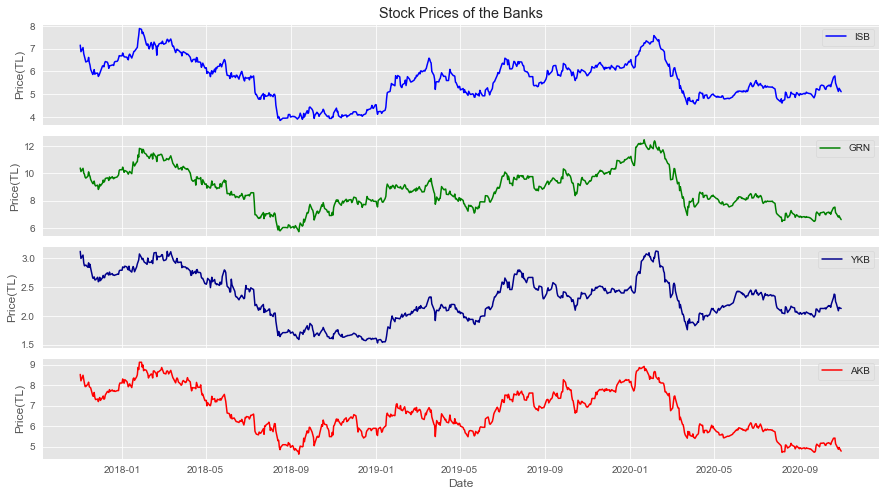

In [9]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,8) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p5,  x=p5.index,  y='ISB_Close', color='b', label='ISB', ax=ax0 )
ax0.set(title='Stock Prices of the Banks', ylabel='Price(TL)')

sns.lineplot( data=p5,  x=p5.index,  y='GRN_Close', color='g', label='GRN', ax=ax1 )
ax1.set( ylabel='Price(TL)' )


sns.lineplot( data=p5,  x=p5.index,  y='YKB_Close', color='darkblue', label='YKB', ax=ax2 )
ax2.set( ylabel='Price(TL)' )


sns.lineplot( data=p5,  x=p5.index,  y='AKB_Close', color='r', label='AKB', ax=ax3 )
ax3.set( ylabel='Price(TL)' )

plt.show()

## 3. ROLLING MEAN (MOVING AVERAGE)

In [10]:
p1 = p5.copy()
p1['ISB_rol_20'] = p1['ISB_Close'].rolling(20).mean()
p1['GRN_rol_20'] = p1['GRN_Close'].rolling(20).mean()
p1['YKB_rol_20'] = p1['YKB_Close'].rolling(20).mean()
p1['AKB_rol_20'] = p1['AKB_Close'].rolling(20).mean()

p1['ISB_rol_50'] = p1['ISB_Close'].rolling(50).mean()
p1['GRN_rol_50'] = p1['GRN_Close'].rolling(50).mean()
p1['YKB_rol_50'] = p1['YKB_Close'].rolling(50).mean()
p1['AKB_rol_50'] = p1['AKB_Close'].rolling(50).mean()

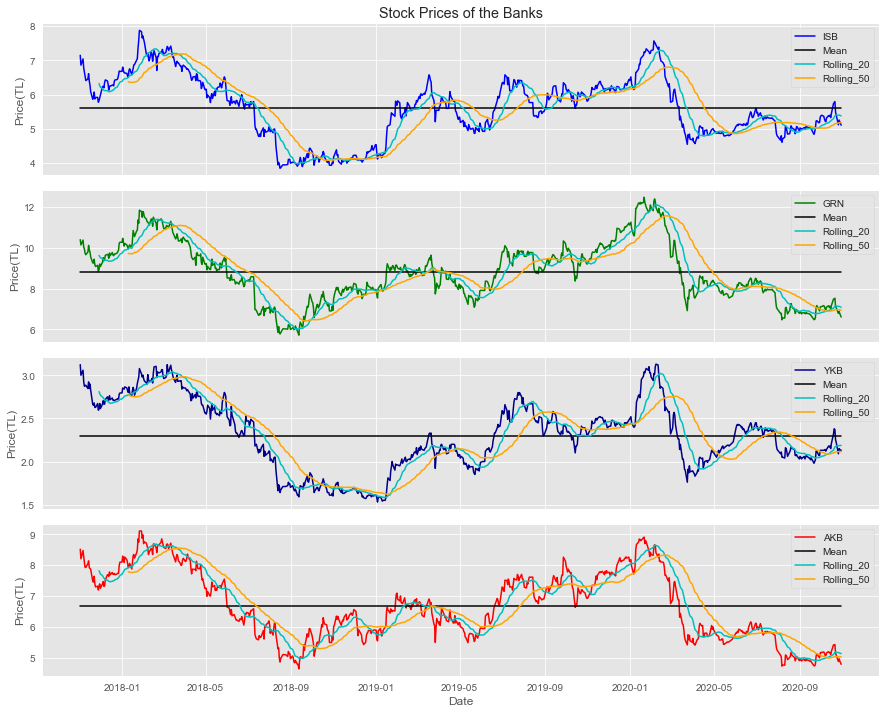

In [11]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,12) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='ISB_Close',              color='b', label='ISB', ax=ax0 )
sns.lineplot( data=p1,  x=p1.index,  y = p1['ISB_Close'].mean(), color='k', label='Mean', ax=ax0 )
sns.lineplot( data=p1,  x=p1.index,  y='ISB_rol_20',             color='c', label='Rolling_20', ax=ax0 )
sns.lineplot( data=p1,  x=p1.index,  y='ISB_rol_50',             color='orange', label='Rolling_50', ax=ax0 )
ax0.set( title='Stock Prices of the Banks', ylabel='Price(TL)')

sns.lineplot( data=p1,  x=p1.index,  y='GRN_Close',              color='g', label='GRN', ax=ax1 )
sns.lineplot( data=p1,  x=p1.index,  y = p1['GRN_Close'].mean(), color='k', label='Mean', ax=ax1 )
sns.lineplot( data=p1,  x=p1.index,  y='GRN_rol_20',       color='c', label='Rolling_20', ax=ax1 )
sns.lineplot( data=p1,  x=p1.index,  y='GRN_rol_50',       color='orange', label='Rolling_50', ax=ax1 )
ax1.set( ylabel='Price(TL)')

sns.lineplot( data=p1,  x=p1.index,  y='YKB_Close',              color='darkblue', label='YKB', ax=ax2 )
sns.lineplot( data=p1,  x=p1.index,  y = p1['YKB_Close'].mean(), color='k', label='Mean', ax=ax2 )
sns.lineplot( data=p1,  x=p1.index,  y='YKB_rol_20',       color='c', label='Rolling_20', ax=ax2 )
sns.lineplot( data=p1,  x=p1.index,  y='YKB_rol_50',       color='orange', label='Rolling_50', ax=ax2 )
ax2.set( ylabel='Price(TL)')

sns.lineplot( data=p1,  x=p1.index,  y='AKB_Close',              color='r', label='AKB', ax=ax3 )
sns.lineplot( data=p1,  x=p1.index,  y = p1['AKB_Close'].mean(), color='k', label='Mean', ax=ax3 )
sns.lineplot( data=p1,  x=p1.index,  y='AKB_rol_20',       color='c', label='Rolling_20', ax=ax3 )
sns.lineplot( data=p1,  x=p1.index,  y='AKB_rol_50',       color='orange', label='Rolling_50', ax=ax3 )
ax3.set( ylabel='Price(TL)')

plt.show()

## 4. VOLUME

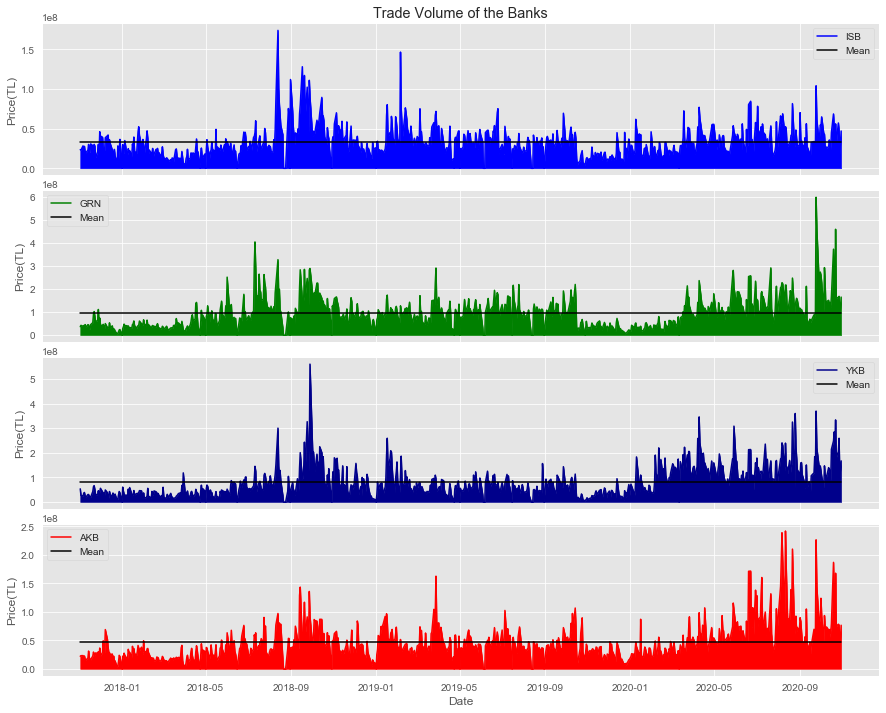

In [12]:
v1 = df.loc[n_years_ago:][['ISB_Volume', 'GRN_Volume', 'YKB_Volume', 'AKB_Volume']]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,12) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=v1,  x=v1.index,  y='ISB_Volume',              color='b', label='ISB', ax=ax0 )
sns.lineplot( data=v1,  x=v1.index,  y = v1['ISB_Volume'].mean(), color='k', label='Mean', ax=ax0 )
ax0.set( title='Trade Volume of the Banks', ylabel='Price(TL)')
ax0.fill_between(v1.index.values, v1.ISB_Volume.values, color='b')

sns.lineplot( data=v1,  x=v1.index,  y='GRN_Volume',              color='g', label='GRN', ax=ax1 )
sns.lineplot( data=v1,  x=v1.index,  y = v1['GRN_Volume'].mean(), color='k', label='Mean', ax=ax1 )
ax1.set( ylabel='Price(TL)')
ax1.fill_between(v1.index.values, v1.GRN_Volume.values, color='g')

sns.lineplot( data=v1,  x=v1.index,  y='YKB_Volume',              color='darkblue', label='YKB', ax=ax2 )
sns.lineplot( data=v1,  x=v1.index,  y = v1['YKB_Volume'].mean(), color='k', label='Mean', ax=ax2 )
ax2.set( ylabel='Price(TL)')
ax2.fill_between(v1.index.values, v1.YKB_Volume.values, color='darkblue')

sns.lineplot( data=v1,  x=v1.index,  y='AKB_Volume',              color='r', label='AKB', ax=ax3 )
sns.lineplot( data=v1,  x=v1.index,  y = v1['AKB_Volume'].mean(), color='k', label='Mean', ax=ax3 )
ax3.set( ylabel='Price(TL)')
ax3.fill_between(v1.index.values, v1.AKB_Volume.values, color='r')

plt.show()

## 5. RETURN CALCULATION

### 5.1. PERCENTAGE CHANGE IN PRICES

In [13]:
p1['ISB_Return_Pct'] = p1['ISB_Close'].pct_change()
p1['GRN_Return_Pct'] = p1['GRN_Close'].pct_change()
p1['YKB_Return_Pct'] = p1['YKB_Close'].pct_change()
p1['AKB_Return_Pct'] = p1['AKB_Close'].pct_change()

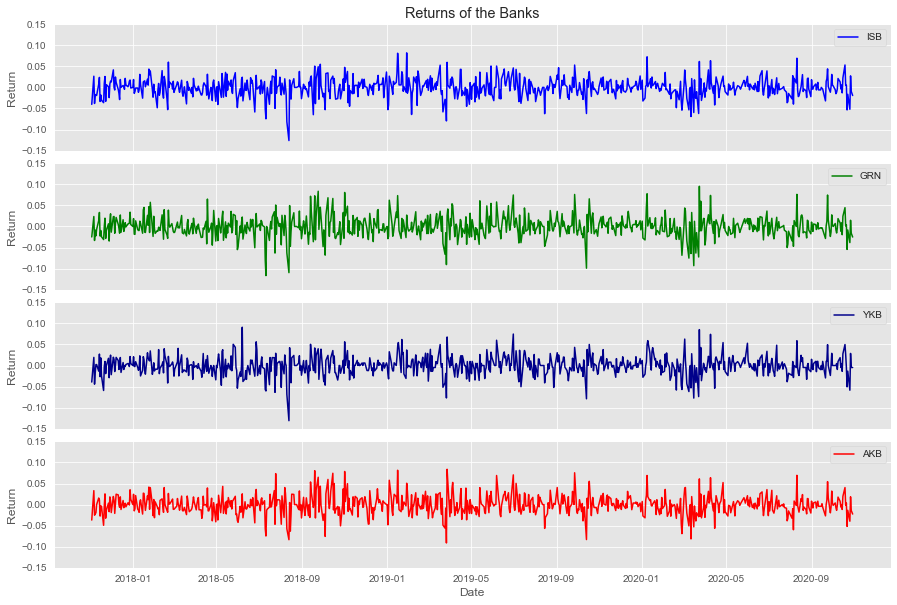

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,10) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='ISB_Return_Pct', color='b', label='ISB', ax=ax0 )
ax0.set(title='Returns of the Banks', ylabel='Return', ylim=(-0.15,0.15) )

sns.lineplot( data=p1,  x=p1.index,  y='GRN_Return_Pct', color='g', label='GRN', ax=ax1 )
ax1.set( ylabel='Return' , ylim=(-0.15,0.15)  )

sns.lineplot( data=p1,  x=p1.index,  y='YKB_Return_Pct', color='darkblue', label='YKB', ax=ax2 )
ax2.set( ylabel='Return' , ylim=(-0.15,0.15)  )

sns.lineplot( data=p1,  x=p1.index,  y='AKB_Return_Pct', color='r', label='AKB', ax=ax3 )
ax3.set( ylabel='Return' , ylim=(-0.15,0.15)  )

plt.show()

### 5.2. LOGARITHM OF RATIO OF PRICES

In [15]:
p1['ISB_Return_ln'] = np.log( p1['ISB_Close'] / p1['ISB_Close'].shift(1) )       
p1['GRN_Return_ln'] = np.log( p1['GRN_Close'] / p1['GRN_Close'].shift(1) )
p1['YKB_Return_ln'] = np.log( p1['YKB_Close'] / p1['YKB_Close'].shift(1) )       
p1['AKB_Return_ln'] = np.log( p1['AKB_Close'] / p1['AKB_Close'].shift(1) )

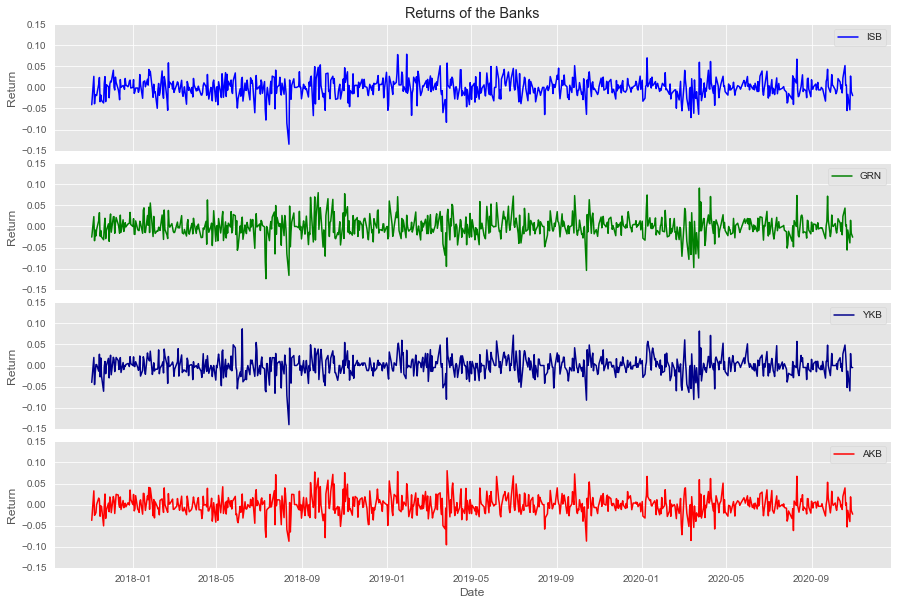

In [16]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,10) , sharex=True)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('')

sns.lineplot( data=p1,  x=p1.index,  y='ISB_Return_ln', color='b', label='ISB', ax=ax0 )
ax0.set(title='Returns of the Banks', ylabel='Return', ylim=(-0.15,0.15) )

sns.lineplot( data=p1,  x=p1.index,  y='GRN_Return_ln', color='g', label='GRN', ax=ax1 )
ax1.set( ylabel='Return' , ylim=(-0.15,0.15)  )

sns.lineplot( data=p1,  x=p1.index,  y='YKB_Return_ln', color='darkblue', label='YKB', ax=ax2 )
ax2.set( ylabel='Return' , ylim=(-0.15,0.15)  )

sns.lineplot( data=p1,  x=p1.index,  y='AKB_Return_ln', color='r', label='AKB', ax=ax3 )
ax3.set( ylabel='Return' , ylim=(-0.15,0.15)  )

plt.show()

### 5.3. HISTOGRAM OF PERCENTAGE RETURNS

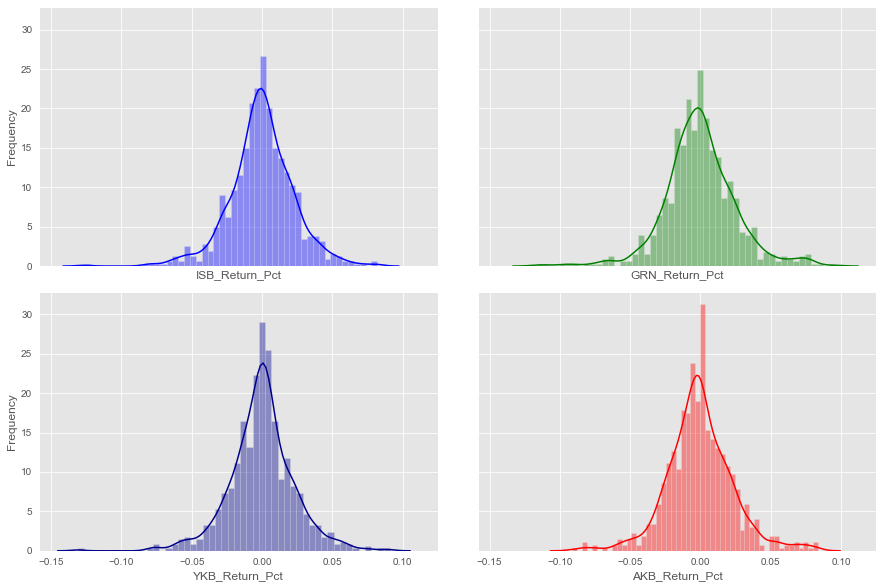

In [17]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15,10) , sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle('')

sns.distplot( p1['ISB_Return_Pct'], norm_hist=True, color='b', bins=50, ax=ax0 )
ax0.set( ylabel='Frequency' )

sns.distplot( p1['GRN_Return_Pct'], norm_hist=True, color='g', bins=50, ax=ax1 )
ax1.set()

sns.distplot( p1['YKB_Return_Pct'], norm_hist=True, color='darkblue', bins=50, ax=ax2 )
ax2.set( ylabel='Frequency' )

sns.distplot( p1['AKB_Return_Pct'], norm_hist=True, color='r', bins=50, ax=ax3 )
ax3.set()


plt.show()

## 6. COMPARISON OF THE RETURNS

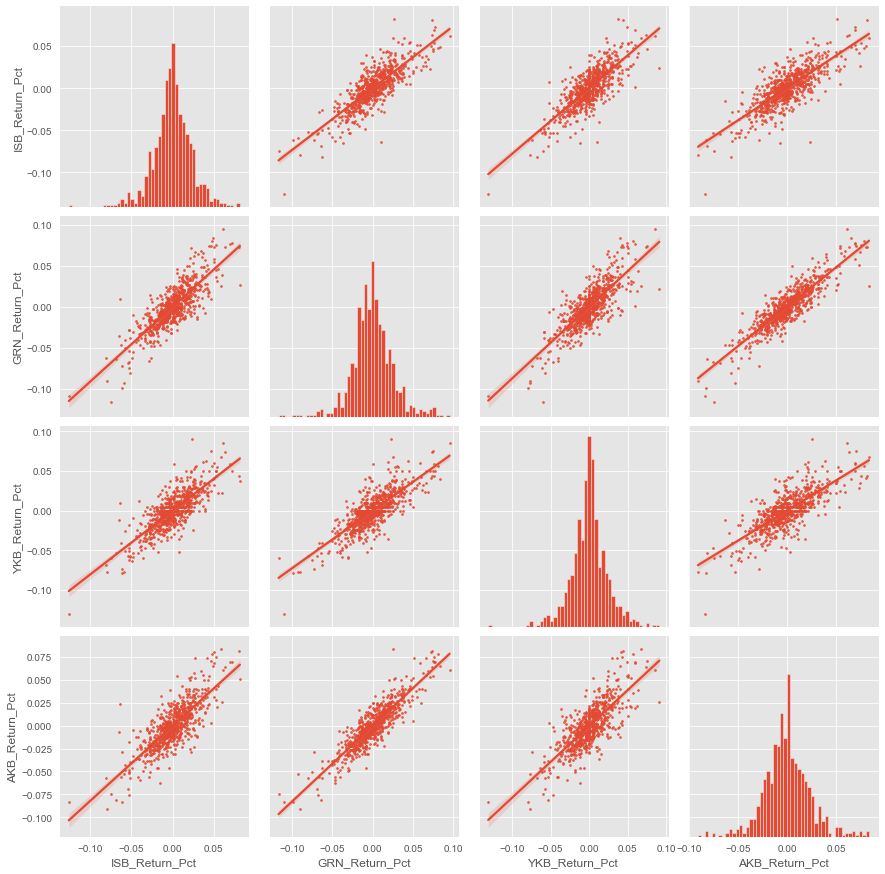

In [18]:
sns.pairplot( p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']],
              kind='reg', height=3, diag_kind='hist', diag_kws=dict(bins=50), plot_kws=dict( scatter_kws={'s':3}) )
plt.show()

## 7. CORRELATION BETWEEN THE STOCKS

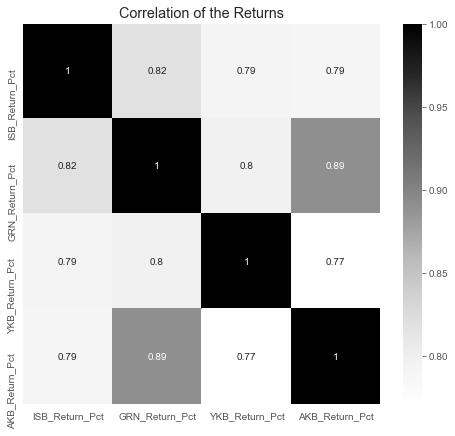

In [19]:
fig, ax = plt.subplots( figsize=(8,7) )

sns.heatmap( p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].corr(), annot=True, cmap='Greys')
ax.set( title='Correlation of the Returns')

plt.show()

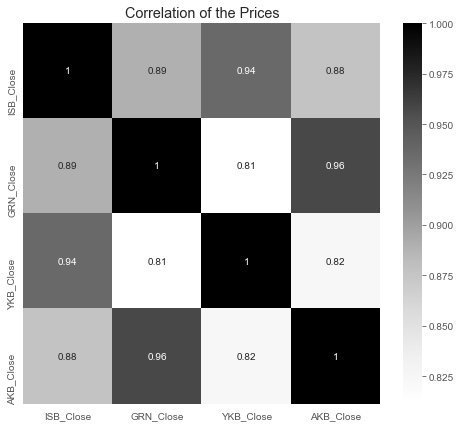

In [20]:
fig, ax = plt.subplots( figsize=(8,7) )

sns.heatmap( p1[['ISB_Close', 'GRN_Close', 'YKB_Close', 'AKB_Close']].corr(), annot=True, cmap='Greys' )
ax.set( title='Correlation of the Prices')

plt.show()

## 8. RISK AND RETURN

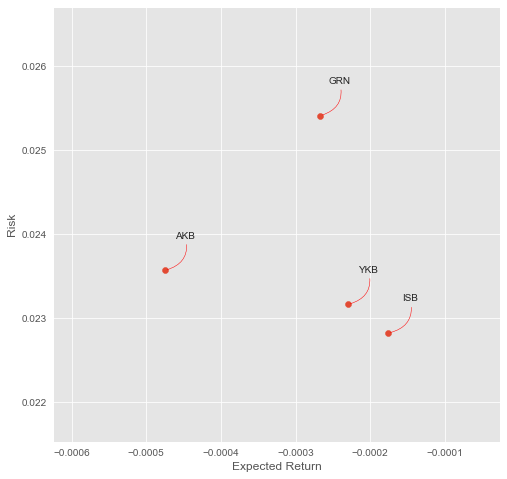

In [21]:
x_max = p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].mean().max()
x_min = p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].mean().min()

y_max = p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].std().max()
y_min = p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].std().min()


plt.figure(figsize=(8,8))
plt.scatter( p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].mean(),
             p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].std()  )

plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim( x_min - (x_max-x_min)/2, x_max + (x_max-x_min)/2 )
plt.ylim( y_min - (y_max-y_min)/2, y_max + (y_max-y_min)/2 )

for label, x, y in zip (['ISB', 'GRN', 'YKB', 'AKB'], 
                        p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].mean(), 
                        p1[['ISB_Return_Pct', 'GRN_Return_Pct', 'YKB_Return_Pct', 'AKB_Return_Pct']].std() ):
    plt.annotate( label, xy=(x,y), xytext=(30,30), textcoords='offset points', ha='right', va='bottom',
                  arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3, rad=-0.5'))

plt.show()

<body><center> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </center></body> 

<body><center> This notebook is written by </center></body>

**<h3><center> INAN KILIC </center></h3>**

<body><center> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </center></body> 